In [60]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import pathlib

import pickle

%matplotlib inline 

In [48]:
weather_dataframe = pd.read_parquet('data/weather/daily_weather.parquet')

In [49]:
my_city_data = weather_dataframe[weather_dataframe['city_name'] == 'Berlin']
my_city_data.head()

,station_id,city_name,date,season,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm,snow_depth_mm,avg_wind_dir_deg,avg_wind_speed_kmh,peak_wind_gust_kmh,avg_sea_level_pres_hpa,sunshine_total_min
0,10384,Berlin,1931-01-01,Winter,4.2,-1.1,NaN,4.6,NaN,NaN,NaN,NaN,NaN,NaN
1,10384,Berlin,1931-01-02,Winter,2.7,1.1,5.0,10.7,NaN,NaN,NaN,NaN,NaN,NaN
2,10384,Berlin,1931-01-03,Winter,2.0,1.1,2.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10384,Berlin,1931-01-05,Winter,1.4,1.1,3.9,1.3,NaN,NaN,NaN,NaN,NaN,NaN
4,10384,Berlin,1931-01-06,Winter,-0.4,-2.2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
my_city_data = my_city_data[my_city_data['date'] >= pd.to_datetime('1980')]

my_city_data = my_city_data[['date', 'avg_temp_c', 'precipitation_mm', 'avg_sea_level_pres_hpa']]

In [51]:
my_city_data[my_city_data['avg_sea_level_pres_hpa'].isna()]['date']

26879   2008-11-20
27375   2010-03-31
28512   2013-05-11
28513   2013-05-12
28514   2013-05-13
29277   2015-06-15
29278   2015-06-16
29411   2015-10-27
29412   2015-10-28
29413   2015-10-29
30362   2018-06-04
30363   2018-06-05
30364   2018-06-06
30365   2018-06-07
30366   2018-06-08
30367   2018-06-09
30368   2018-06-10
30369   2018-06-11
30370   2018-06-12
Name: date, dtype: datetime64[ns]

In [52]:
my_city_data = my_city_data[(my_city_data['date'] > pd.to_datetime('1980')) & (my_city_data['date'] < pd.to_datetime('1990'))]

In [56]:
my_city_data

,date,avg_temp_c,precipitation_mm,avg_sea_level_pres_hpa
16328,1980-01-01,0.8,1.2,1001.1
16329,1980-01-02,-0.5,0.6,1009.9
16330,1980-01-03,-3.5,0.0,1020.0
16331,1980-01-04,-6.5,2.3,1017.8
16332,1980-01-05,-2.3,0.5,1009.6
...,...,...,...,...
19976,1989-12-27,-1.9,0.0,1017.1
19977,1989-12-28,-2.2,0.0,1021.3
19978,1989-12-29,-2.3,0.0,1027.3
19979,1989-12-30,-0.5,0.0,1026.4


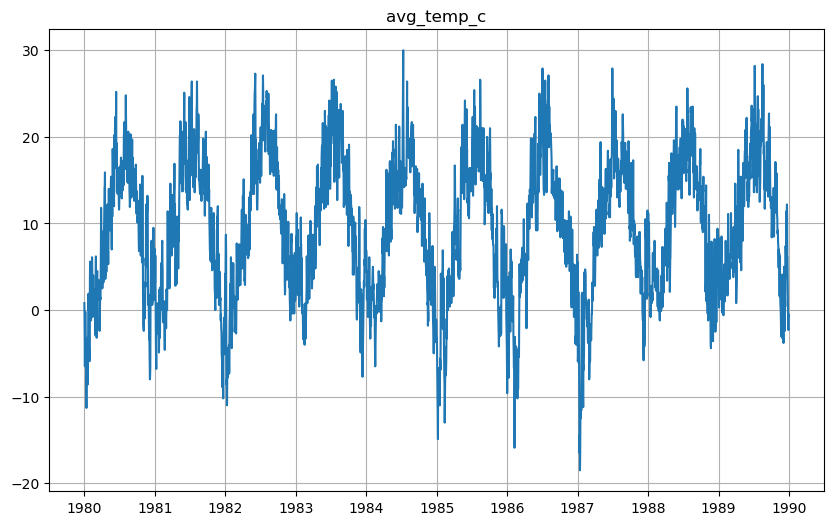

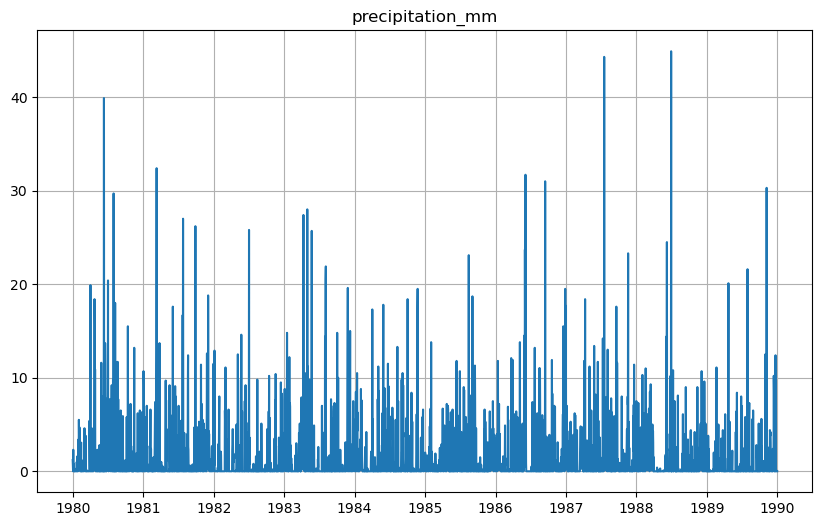

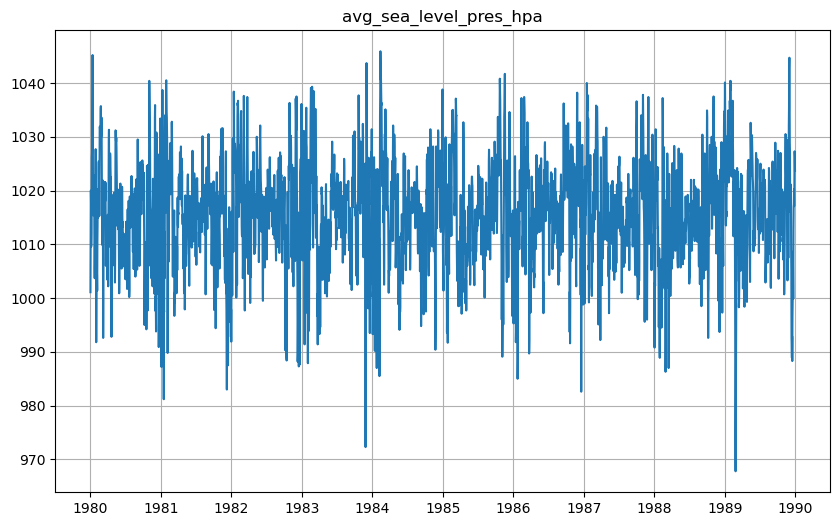

In [69]:
for col in my_city_data.columns:
    if col == 'date':
        continue

    fig, ax = plt.subplots(figsize=(10, 6))

    ax.plot(my_city_data['date'].values, my_city_data[col].values)

    ax.grid(True)
    ax.set_title(col)